In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Al importar el csv, me da un error: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 116: invalid start byte", por lo que he añadido "encodig='windows-1252" al importar el archivo, ya que chatgpt me ha sugerido varias opciones y esta me ha funcionado

In [2]:
df = pd.read_csv('../data/Madrid.csv', delimiter=';', encoding='windows-1252')
print(df.head())

         Viajeros y tasas                     TIPO DE TRANSPORTE  \
0  Viajeros transportados  Transporte urbano regular por autobœs   
1  Viajeros transportados  Transporte urbano regular por autobœs   
2  Viajeros transportados  Transporte urbano regular por autobœs   
3  Viajeros transportados  Transporte urbano regular por autobœs   
4  Viajeros transportados  Transporte urbano regular por autobœs   

         Ciudad  Periodo   Total  
0  28079 Madrid  2024M09  40.130  
1  28079 Madrid  2024M08  25.805  
2  28079 Madrid  2024M07  34.079  
3  28079 Madrid  2024M06  40.315  
4  28079 Madrid  2024M05  42.456  


Para que sea más sencilla la interpretación, he cambiado los nombres que indican el tipo de transporte a únicamente "autobús" y "metro" ya que los anteriores son muy largos. 

In [3]:
df['TIPO DE TRANSPORTE'] = df['TIPO DE TRANSPORTE'].str.replace('Transporte urbano regular por autobœs', 'autobus')
df['TIPO DE TRANSPORTE'] = df['TIPO DE TRANSPORTE'].str.replace('Urbano por metro', 'metro')
print(df.head())

         Viajeros y tasas TIPO DE TRANSPORTE        Ciudad  Periodo   Total
0  Viajeros transportados            autobus  28079 Madrid  2024M09  40.130
1  Viajeros transportados            autobus  28079 Madrid  2024M08  25.805
2  Viajeros transportados            autobus  28079 Madrid  2024M07  34.079
3  Viajeros transportados            autobus  28079 Madrid  2024M06  40.315
4  Viajeros transportados            autobus  28079 Madrid  2024M05  42.456


In [4]:
df['Periodo'] = df['Periodo'].str.replace('M', '', regex=False)
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y%m')
df.set_index('Periodo', inplace=True)

In [5]:
df.head()

Viajeros y tasas TIPO DE TRANSPORTE        Ciudad   Total
Periodo                                                                    
2024-09-01  Viajeros transportados            autobus  28079 Madrid  40.130
2024-08-01  Viajeros transportados            autobus  28079 Madrid  25.805
2024-07-01  Viajeros transportados            autobus  28079 Madrid  34.079
2024-06-01  Viajeros transportados            autobus  28079 Madrid  40.315
2024-05-01  Viajeros transportados            autobus  28079 Madrid  42.456

In [6]:
bus = df[df['TIPO DE TRANSPORTE'] == 'autobus']
metro = df[df['TIPO DE TRANSPORTE'] == 'metro']

**ANÁLISIS INICIAL DEL TRANSPORTE POR TRIMESTRES**

*Análisis inicial*

In [7]:
bus_Q = bus.resample('QE').sum()  # Agrupamos por trimestre
metro_Q = metro.resample('QE').sum()
df_Q = df.resample('QE').sum()

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(bus_Q.index, bus_Q['Total'], label='Autobús', marker='o', color='blue')
plt.plot(metro_Q.index, metro_Q['Total'], label='Metro', marker='o', color='green')
plt.plot(df_Q.index, df_Q['Total'], label='total', marker='o', color='red')

# Títulos y etiquetas
plt.title('Transporte por Trimestres', fontsize=16)
plt.xlabel('Trimestres', fontsize=12)
plt.ylabel('Total de Viajeros (en miles)', fontsize=12)
plt.legend(title='Tipo de Transporte')
plt.grid(True)
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()


*Análisis de estacionalidad*

Transporte total

In [15]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_Q['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte total')

Text(0.5, 1.0, 'Comportamiento estacional del transporte total')

Transporte en metro

Text(0.5, 1.0, 'Comportamiento estacional del transporte en metro')

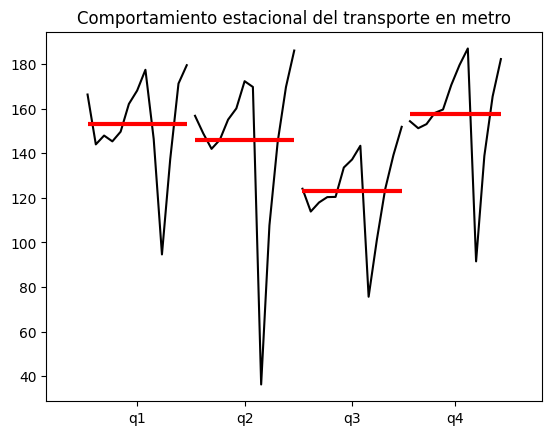

In [16]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(metro_Q['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte en metro')

Transporte en autobús

Text(0.5, 1.0, 'Comportamiento estacional del transporte en autobús')

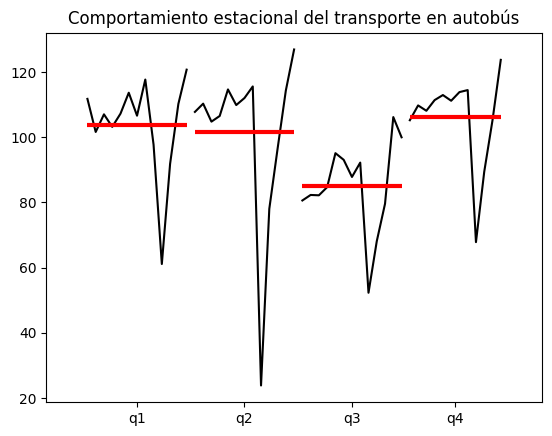

In [17]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(bus_Q['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte en autobús')

*Comportamiento estacional*

Total

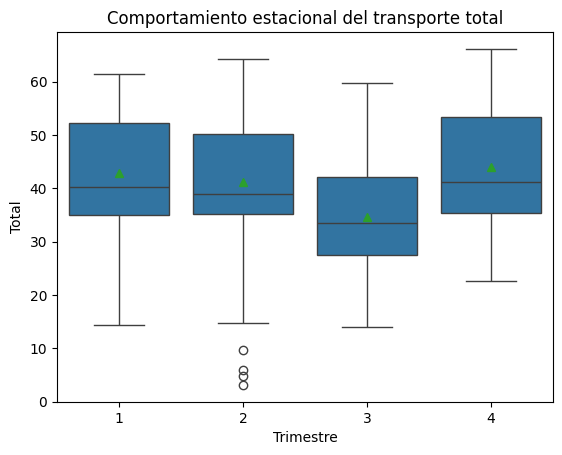

In [21]:
df['QE'] = df.index.quarter

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=df, x='QE', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte total')
ax.set_xlabel('Trimestre')

# Mostrar el gráfico
plt.show()

Autobús

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\2195688794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['QE'] = bus.index.quarter


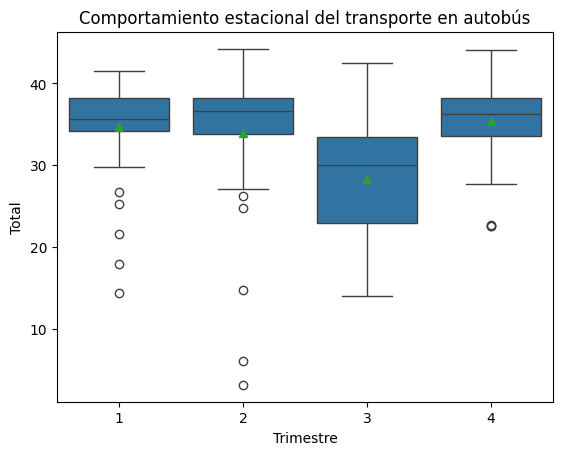

In [24]:
bus['QE'] = bus.index.quarter

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=bus, x='QE', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte en autobús')
ax.set_xlabel('Trimestre')

# Mostrar el gráfico
plt.show()

Metro

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\3101601439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro['QE'] = metro.index.quarter


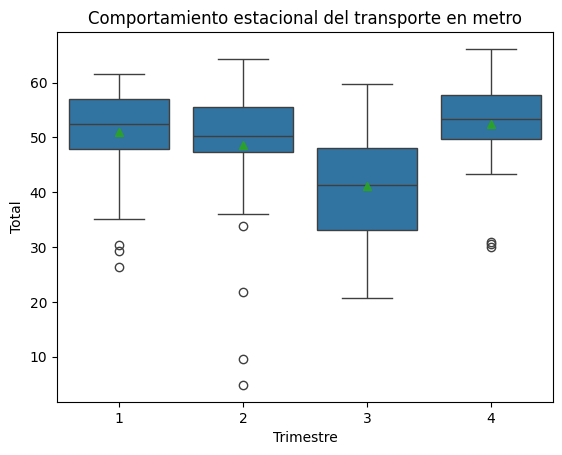

In [25]:
metro['QE'] = metro.index.quarter

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=metro, x='QE', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte en metro')
ax.set_xlabel('Trimestre')

# Mostrar el gráfico
plt.show()

Total

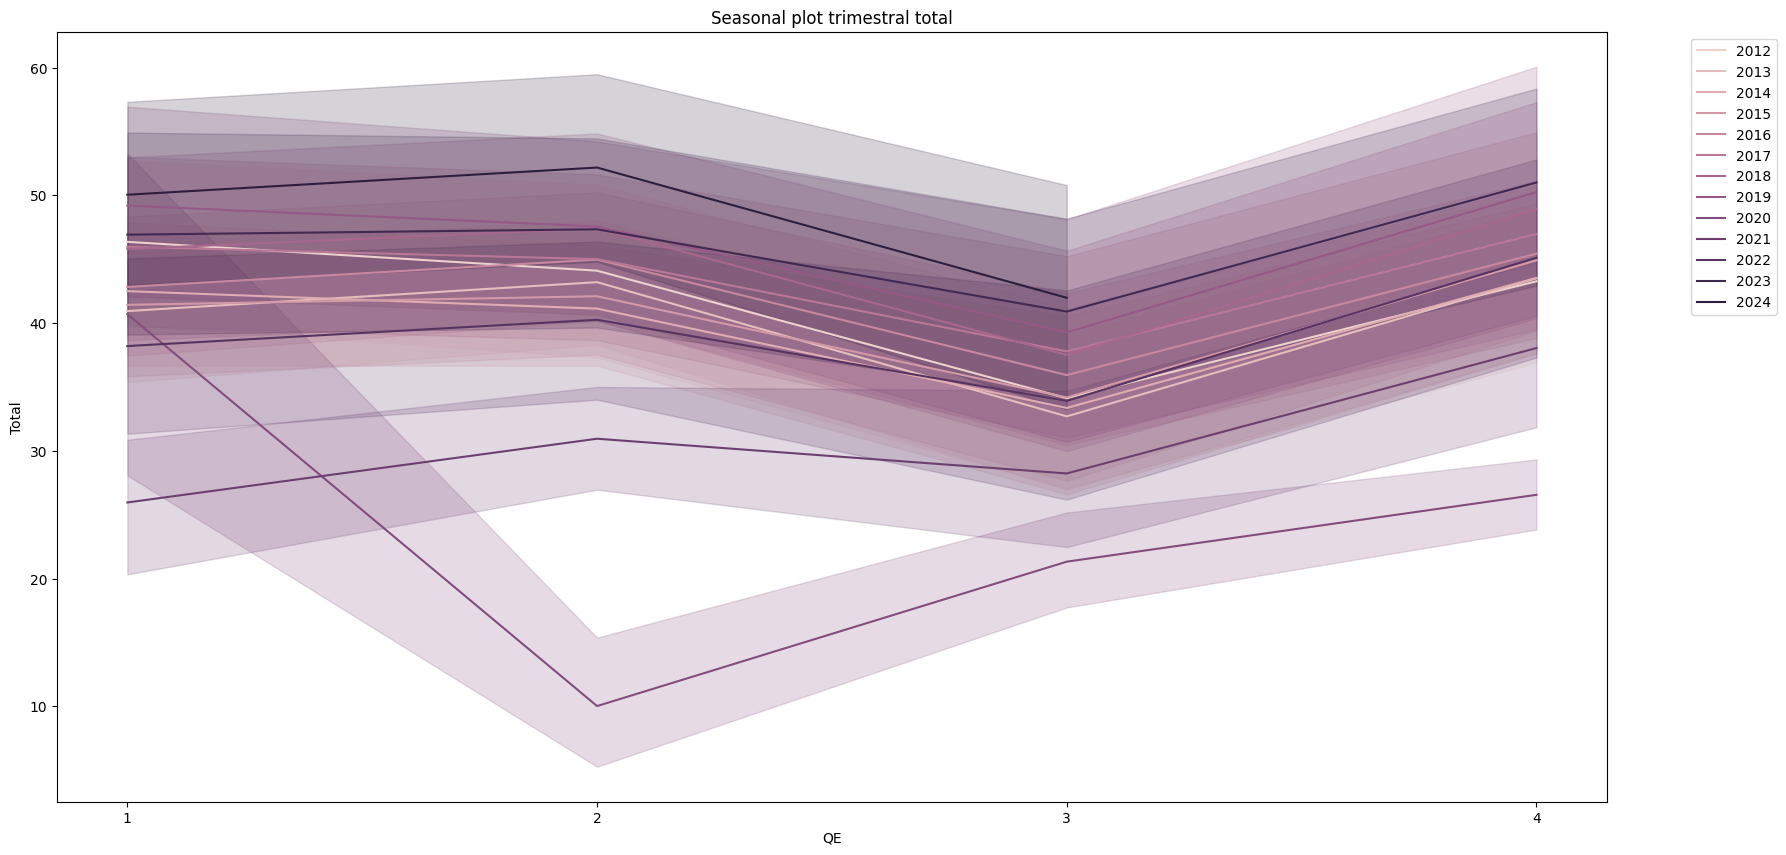

In [62]:
df['Y'] = df.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='QE', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot trimestral total')
plt.gca().set_xticks(df['QE'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Autobús

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\48286012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['Y'] = bus.index.year


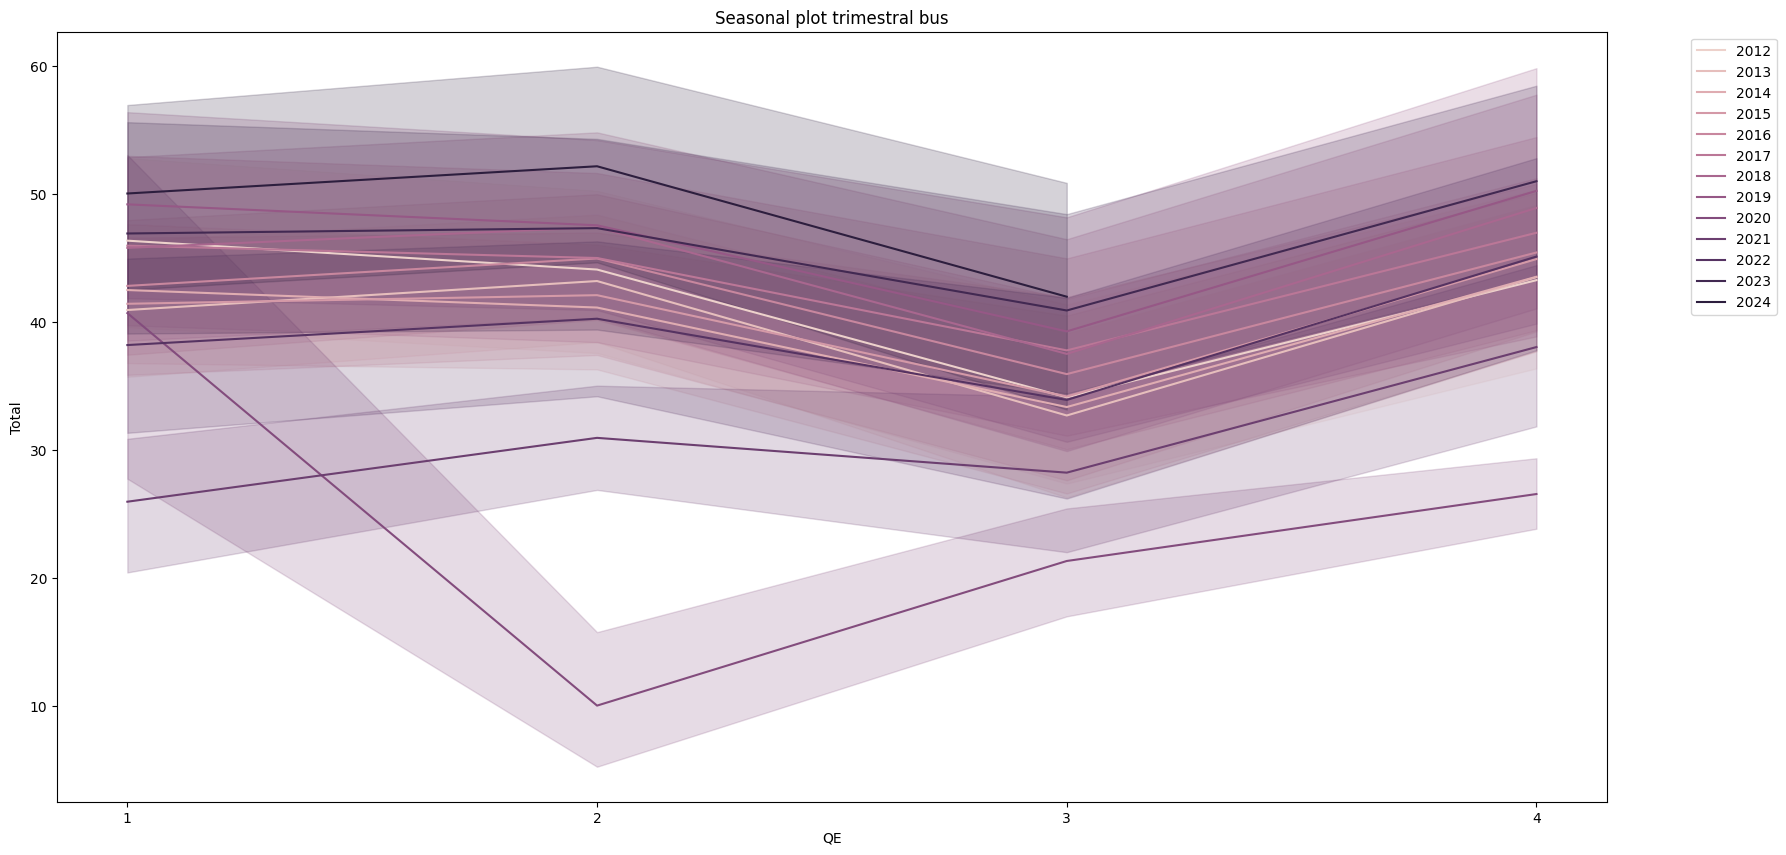

In [61]:
bus['Y'] = bus.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='QE', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot trimestral bus')
plt.gca().set_xticks(bus['QE'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Metro

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\3632167844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro['Y'] = metro.index.year


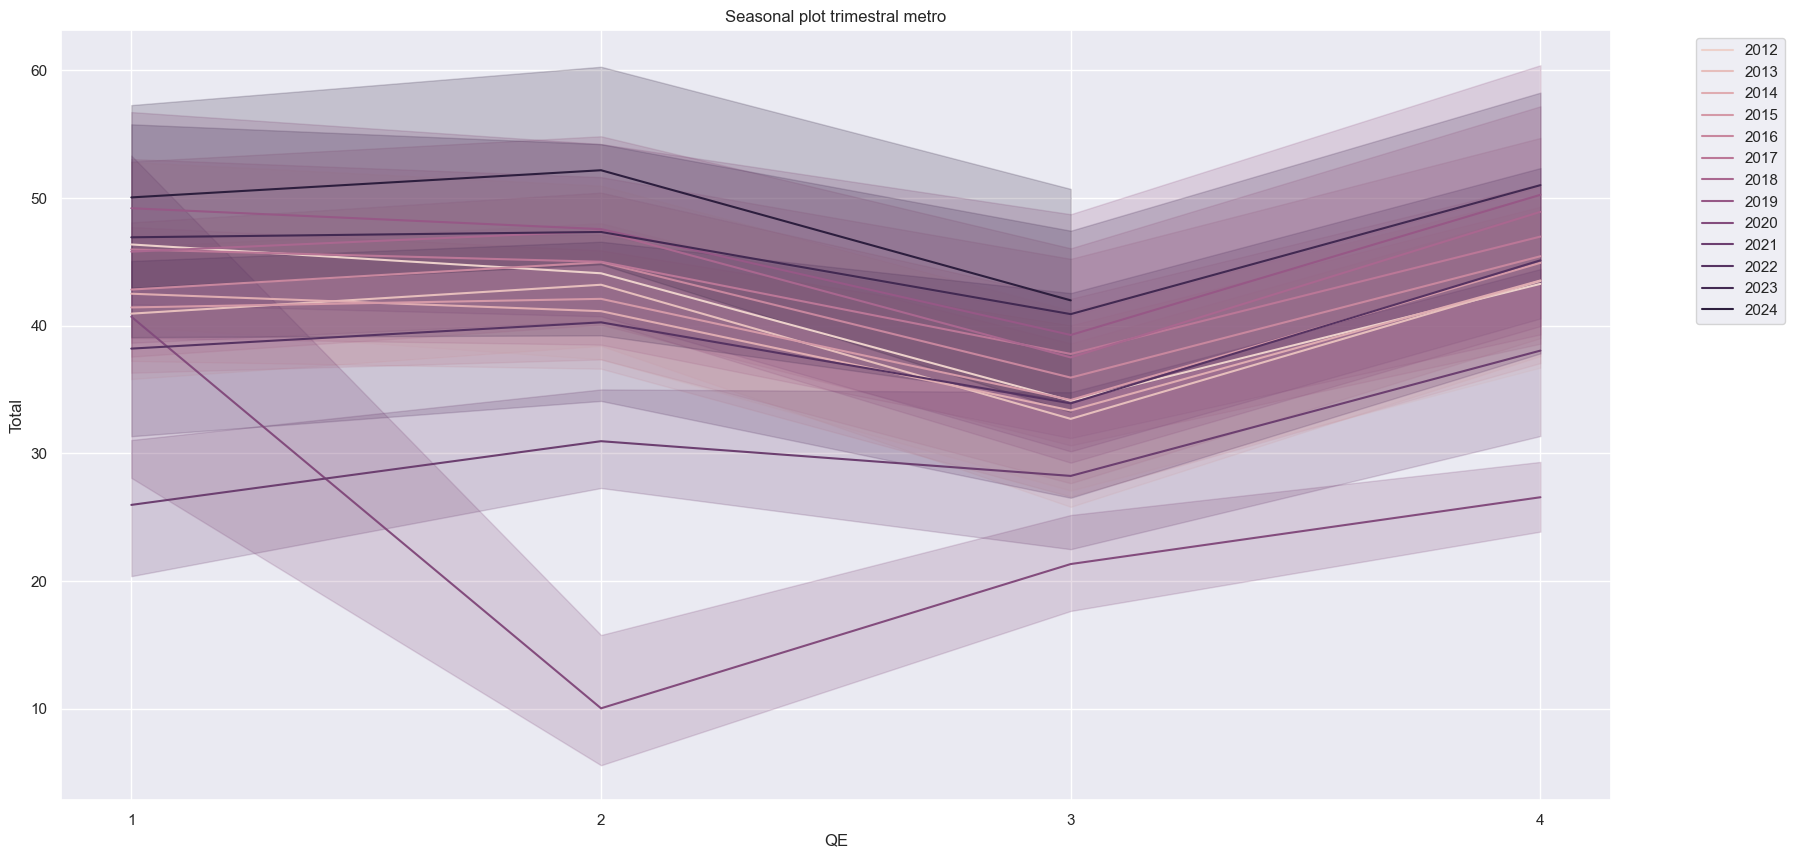

In [67]:
metro['Y'] = metro.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='QE', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot trimestral metro')
plt.gca().set_xticks(metro['QE'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

*Descomposición de la estacionalidad*

Total

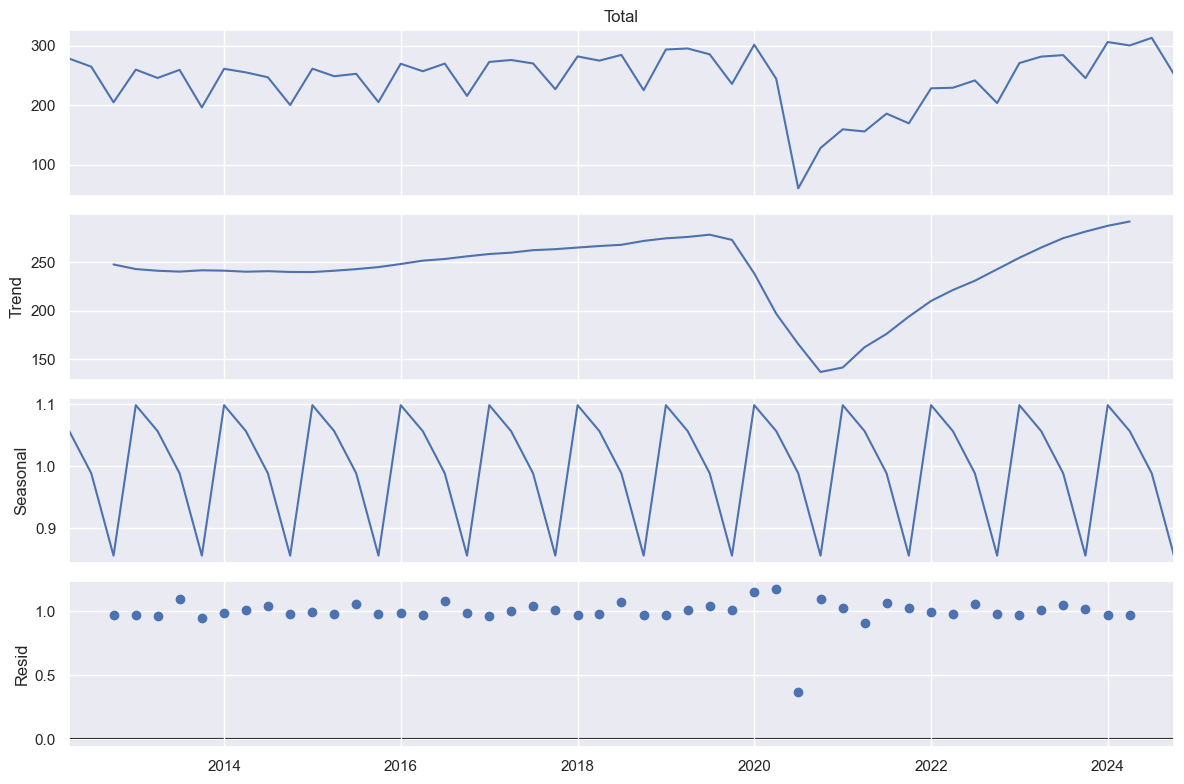

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(df_Q['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

Autobús

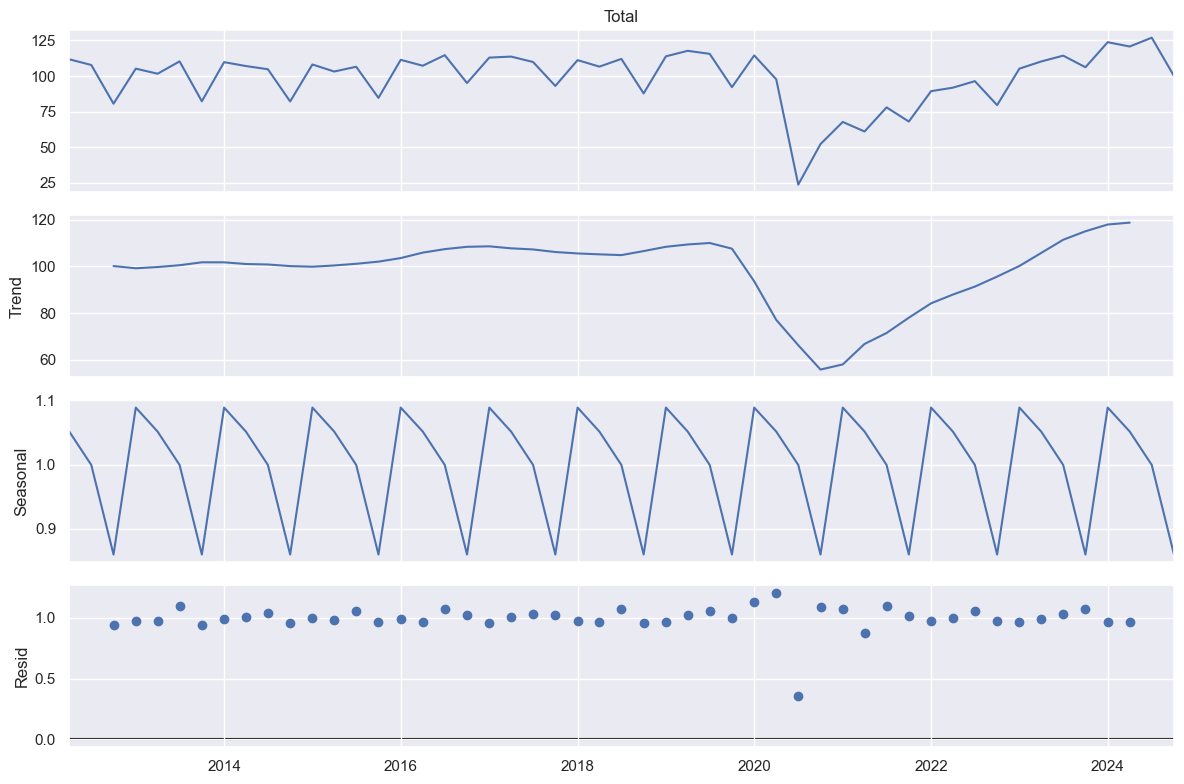

In [70]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(bus_Q['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

Metro

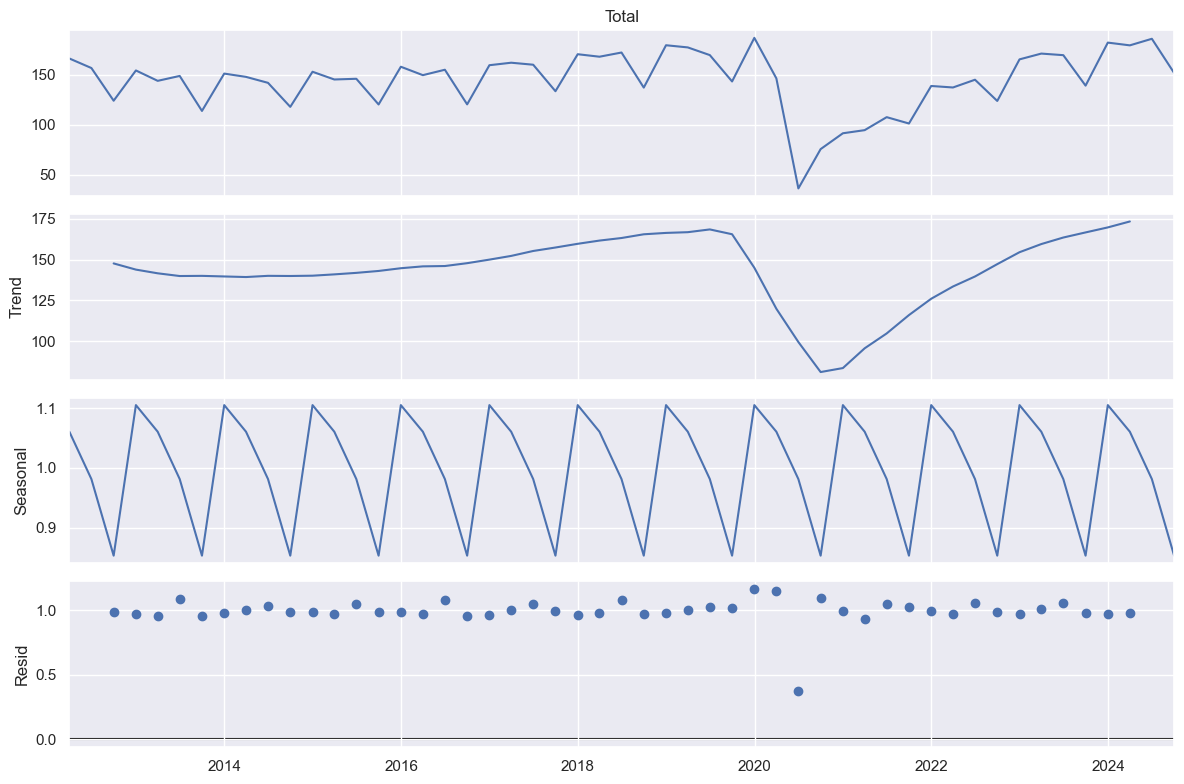

In [71]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(metro_Q['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

**ANÁLISIS INICIAL DEL TRANSPORTE POR MESES**

*Análisis inicial*

In [27]:
bus_M = bus.resample('ME').sum()  # Agrupamos por trimestre
metro_M = metro.resample('ME').sum()
df_M = df.resample('ME').sum()

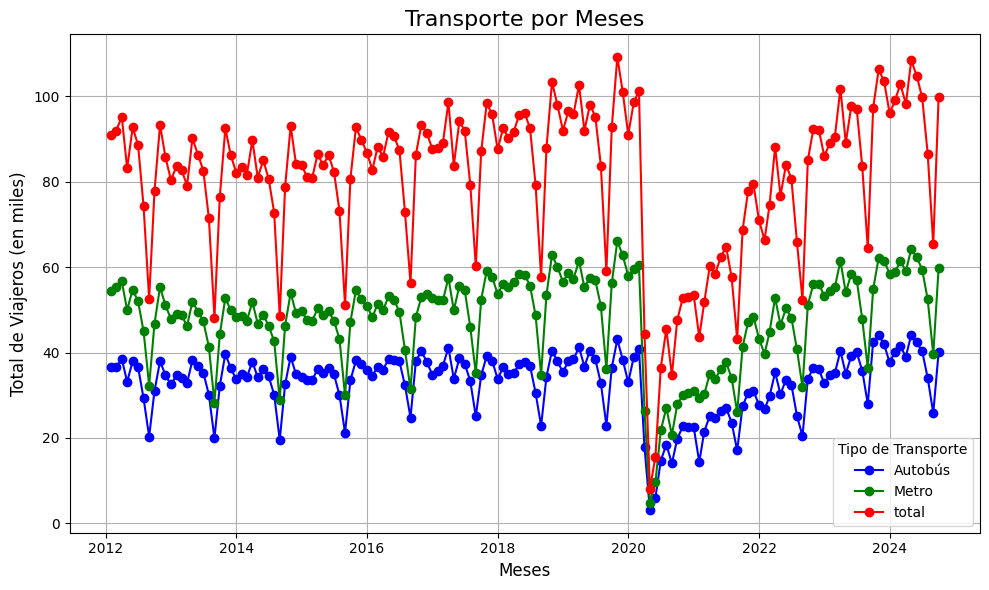

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(bus_M.index, bus_M['Total'], label='Autobús', marker='o', color='blue')
plt.plot(metro_M.index, metro_M['Total'], label='Metro', marker='o', color='green')
plt.plot(df_M.index, df_M['Total'], label='total', marker='o', color='red')

# Títulos y etiquetas
plt.title('Transporte por Meses', fontsize=16)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Total de Viajeros (en miles)', fontsize=12)
plt.legend(title='Tipo de Transporte')
plt.grid(True)
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

*Análisis de estacionalidad*

Transporte total

Text(0.5, 1.0, 'Comportamiento estacional del transporte total')

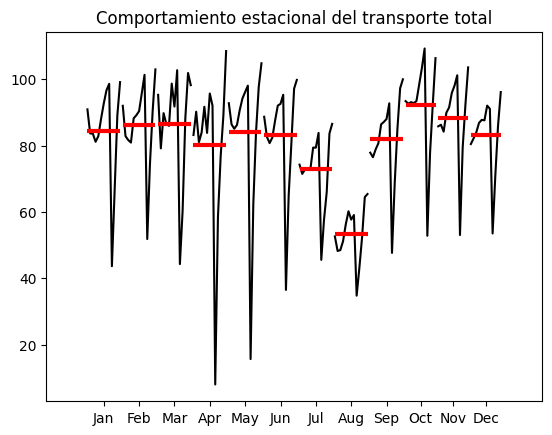

In [30]:
ax = plt.gca()
sm.graphics.tsa.month_plot(df_M['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte total')

Transporte en metro

Text(0.5, 1.0, 'Comportamiento estacional del transporte en metro')

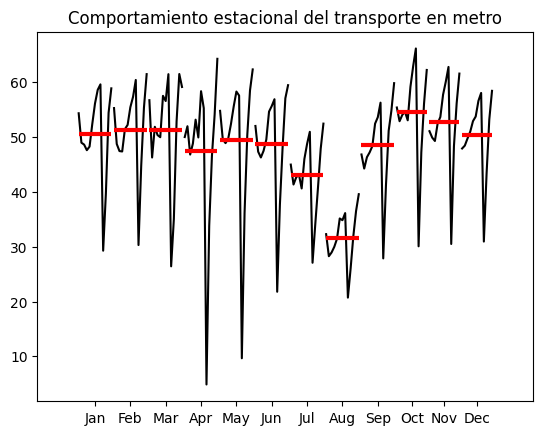

In [31]:
ax = plt.gca()
sm.graphics.tsa.month_plot(metro_M['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte en metro')

Transporte en autobús

Text(0.5, 1.0, 'Comportamiento estacional del transporte en autobús')

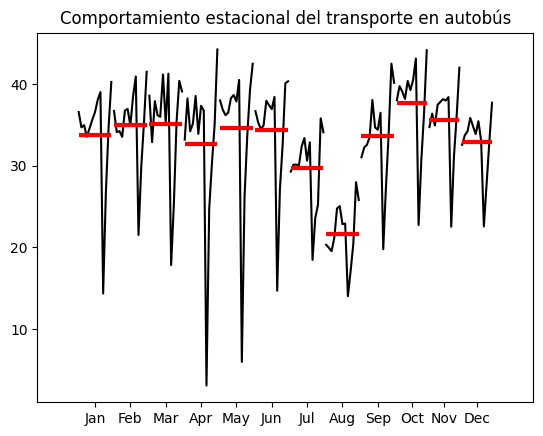

In [32]:
ax = plt.gca()
sm.graphics.tsa.month_plot(bus_M['Total'],ax=ax)
ax.set_title('Comportamiento estacional del transporte en autobús')

*Comportamiento estacional*

Total

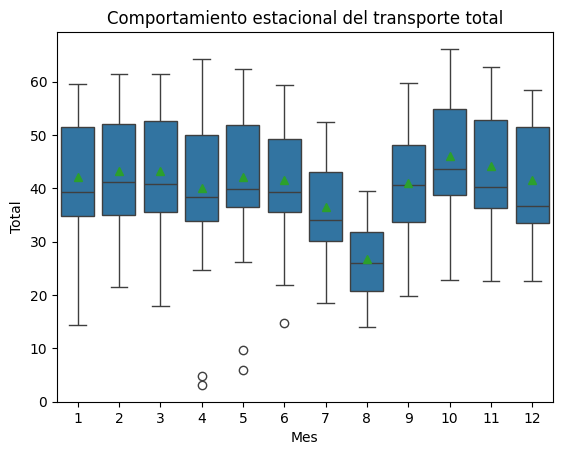

In [33]:
df['ME'] = df.index.month

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=df, x='ME', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte total')
ax.set_xlabel('Mes')

# Mostrar el gráfico
plt.show()

Metro

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\3306069224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro['ME'] = metro.index.month


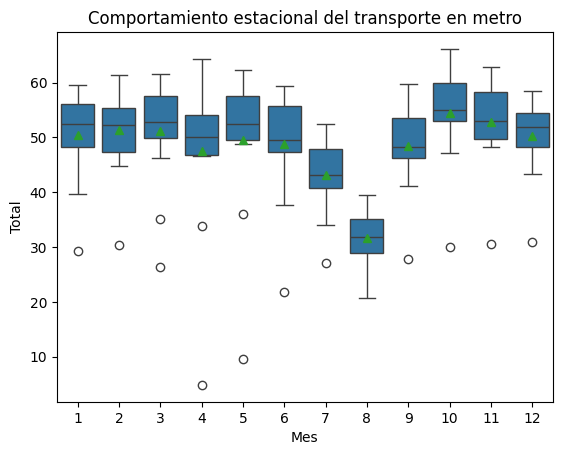

In [34]:
metro['ME'] = metro.index.month

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=metro, x='ME', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte en metro')
ax.set_xlabel('Mes')

# Mostrar el gráfico
plt.show()

Autobús

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\3073133778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['ME'] = bus.index.month


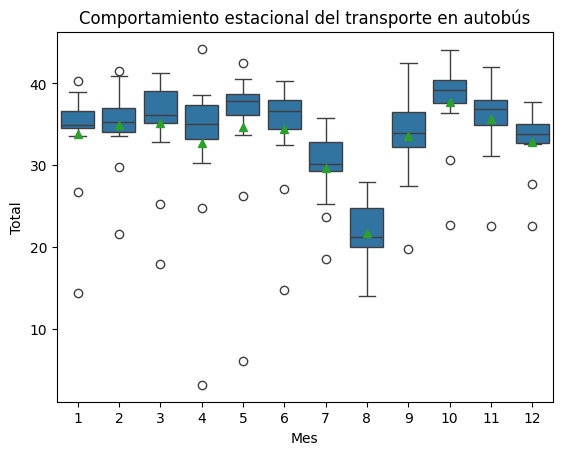

In [35]:
bus['ME'] = bus.index.month

# Ahora graficamos usando 'QE' como el eje X
sns.boxplot(data=bus, x='ME', y='Total', showmeans=True)

# Ajustes del gráfico
ax = plt.gca()
ax.set_ylabel('Total')
ax.set_title('Comportamiento estacional del transporte en autobús')
ax.set_xlabel('Mes')

# Mostrar el gráfico
plt.show()

Total

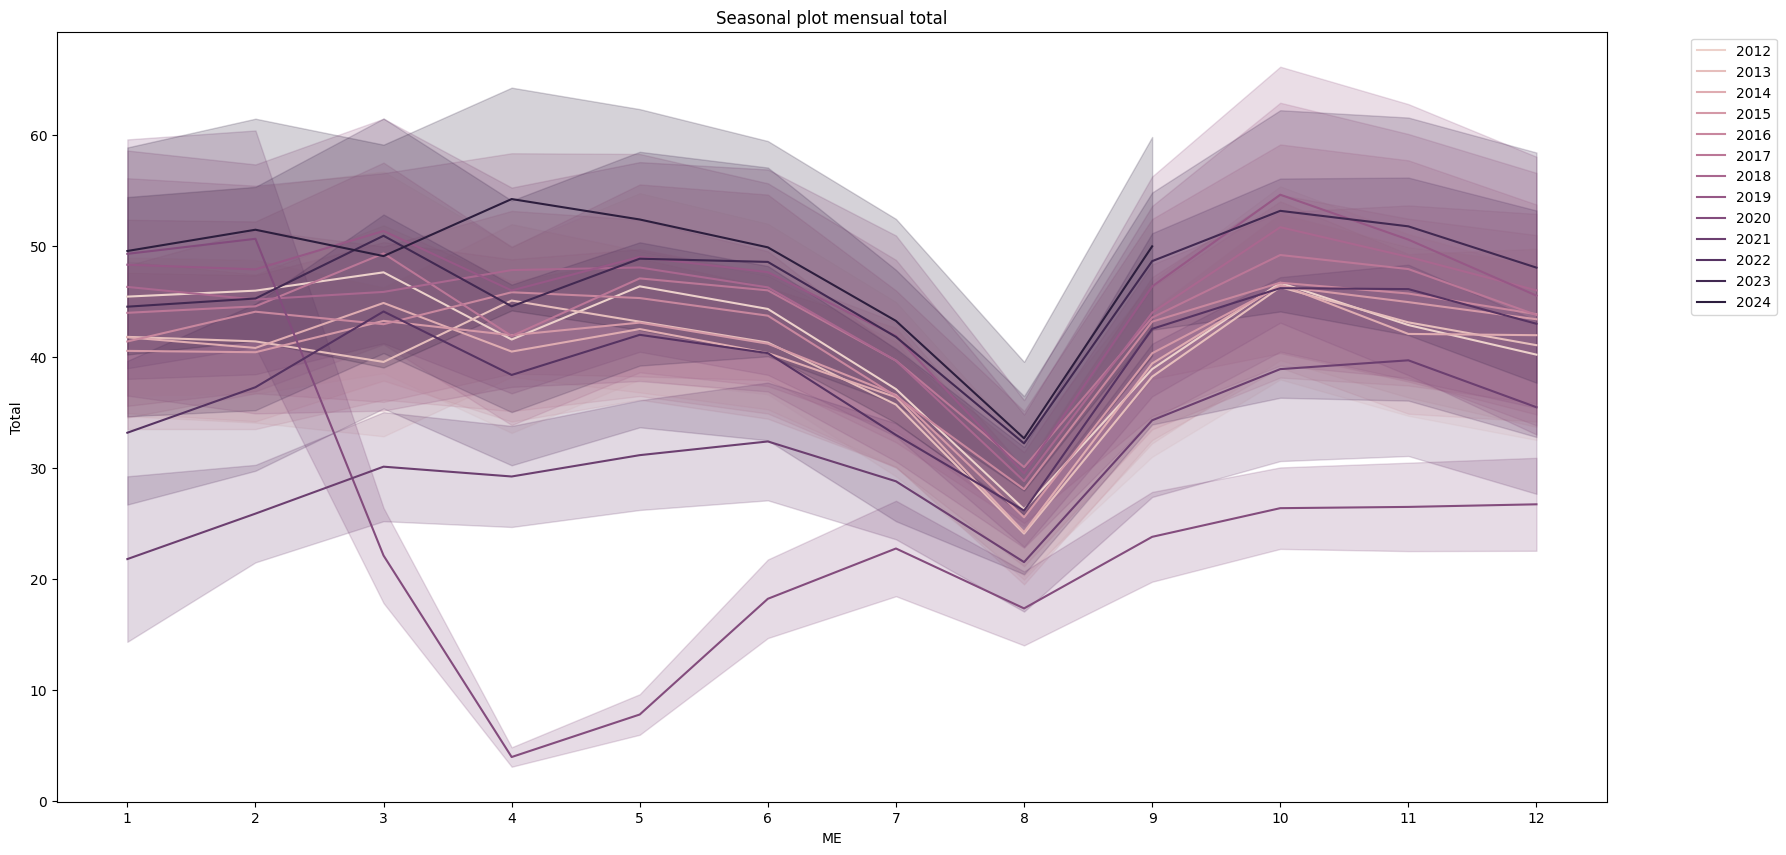

In [57]:
df['Y'] = df.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='ME', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot mensual total')
plt.gca().set_xticks(df['ME'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Autobús

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\2975254040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['Y'] = bus.index.year


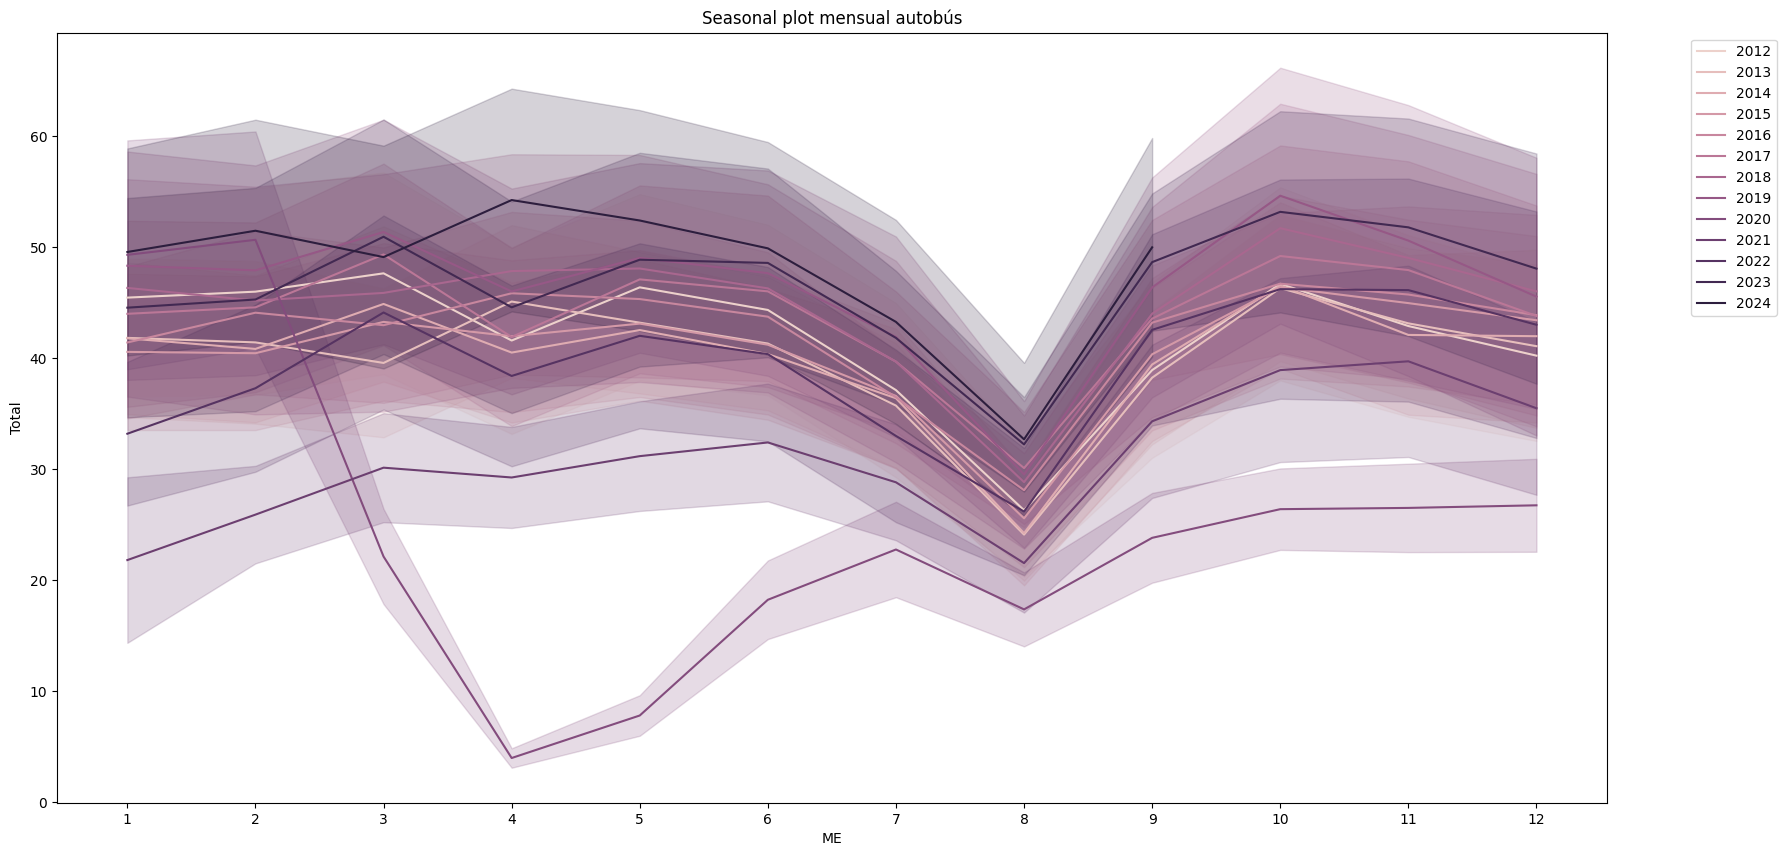

In [58]:
bus['Y'] = bus.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='ME', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot mensual autobús')
plt.gca().set_xticks(bus['ME'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Metro

C:\Users\Sara\AppData\Local\Temp\ipykernel_3576\4094379351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro['Y'] = metro.index.year


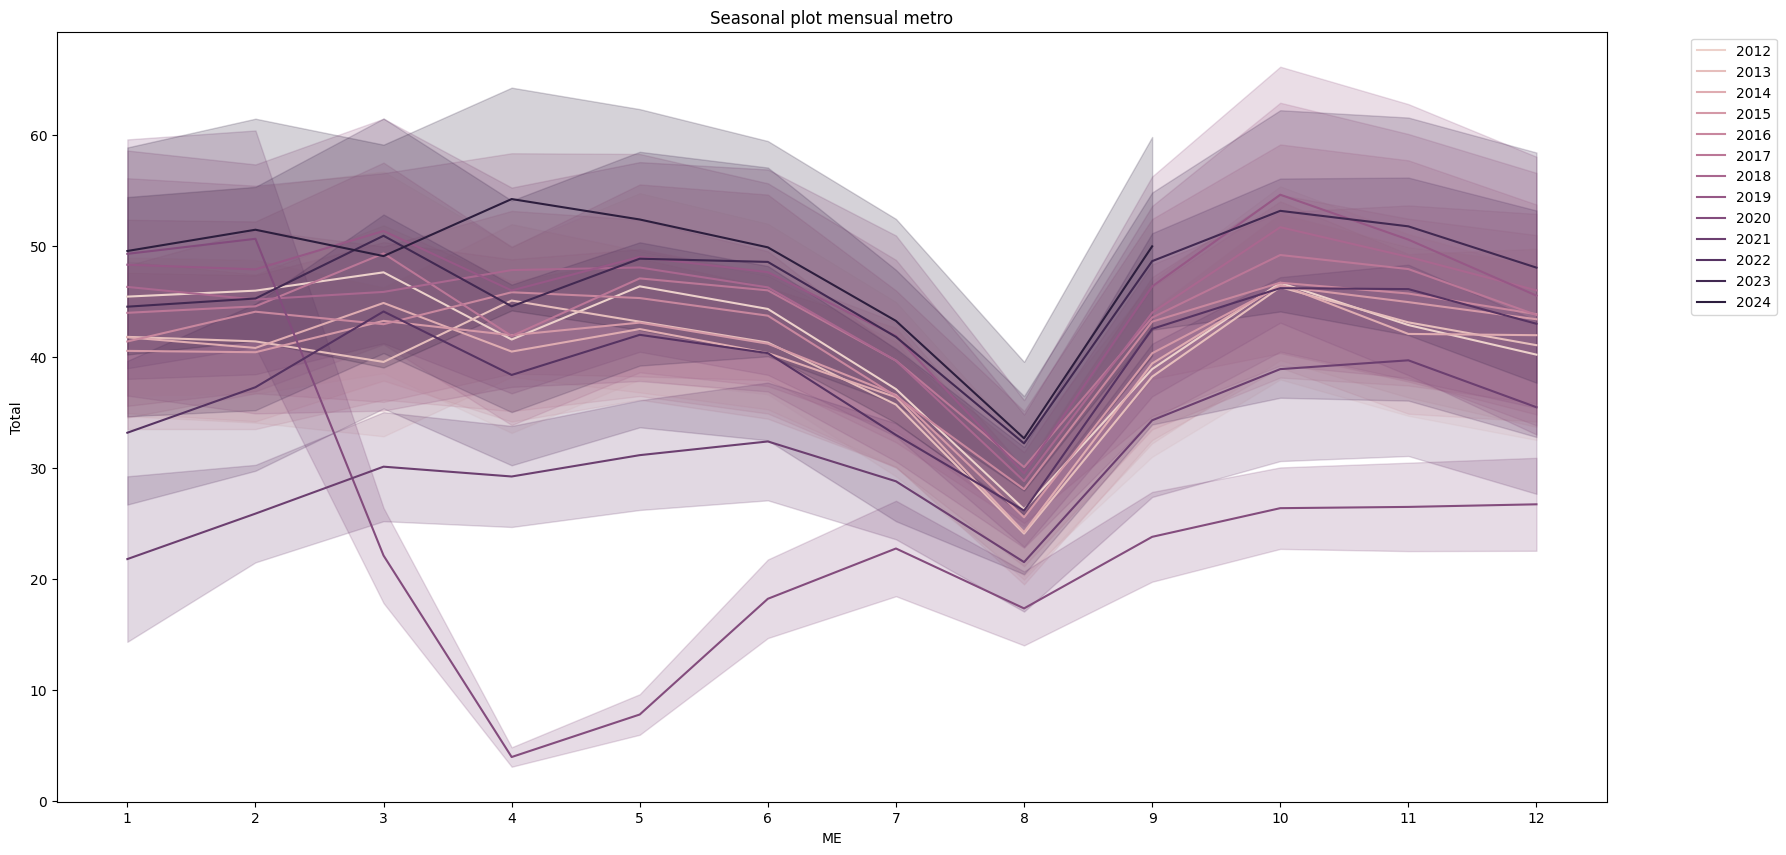

In [59]:
metro['Y'] = metro.index.year
plt.figure(figsize=(20,10)) 
sns.lineplot(data=df, 
             x='ME', 
             y='Total', 
             hue='Y', 
             legend='full')

# add title
plt.title('Seasonal plot mensual metro')
plt.gca().set_xticks(metro['ME'].unique())
# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

*Descomposición de la estacionalidad*

Total

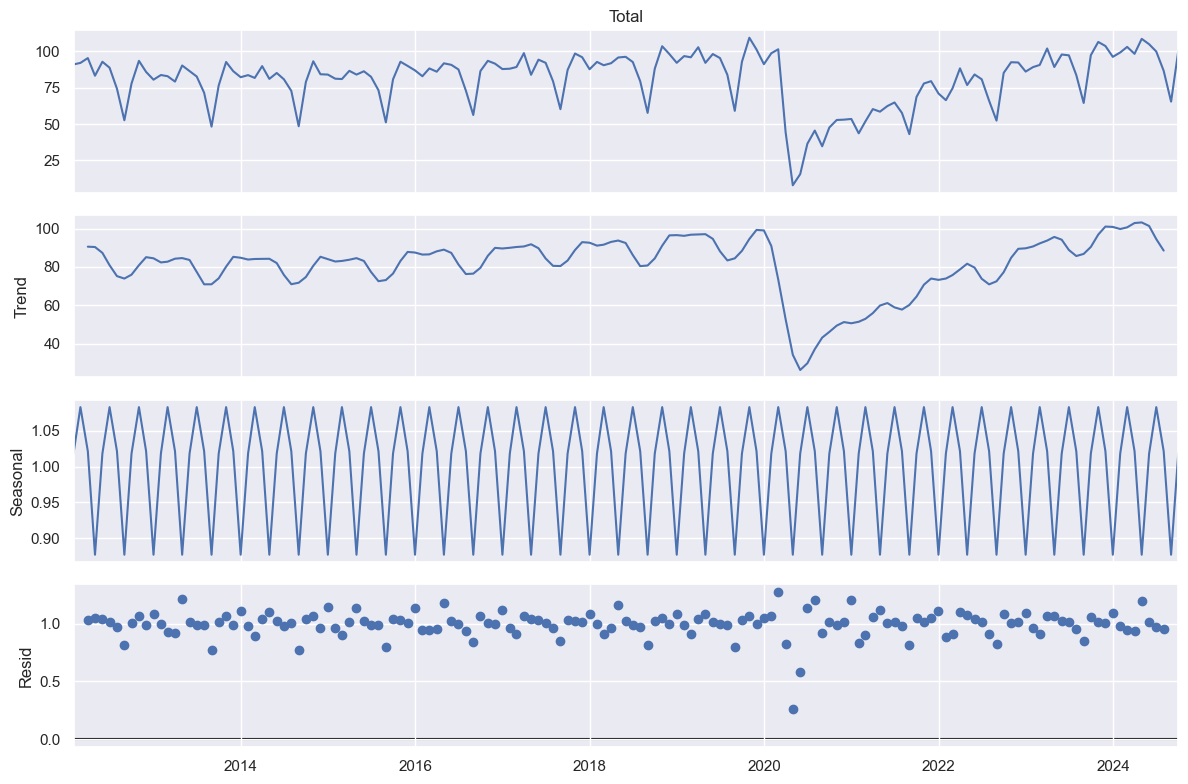

In [72]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(df_M['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

Autobús

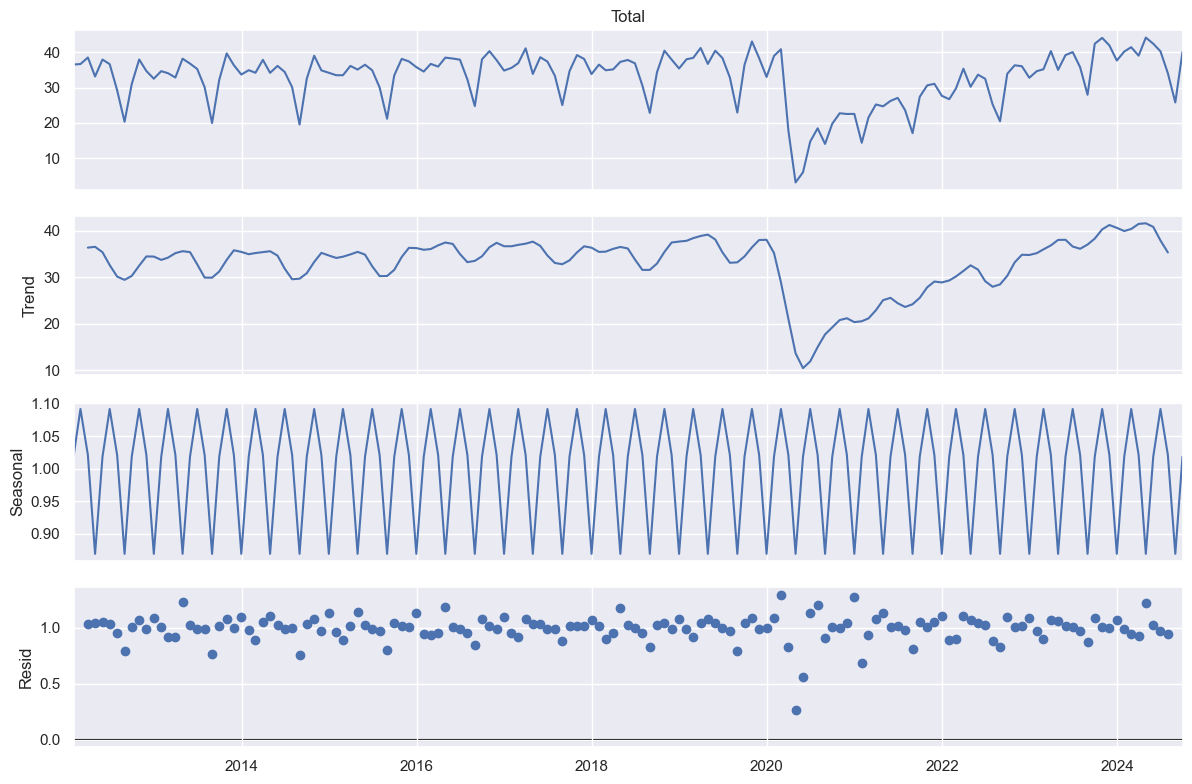

In [73]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(bus_M['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

Metro

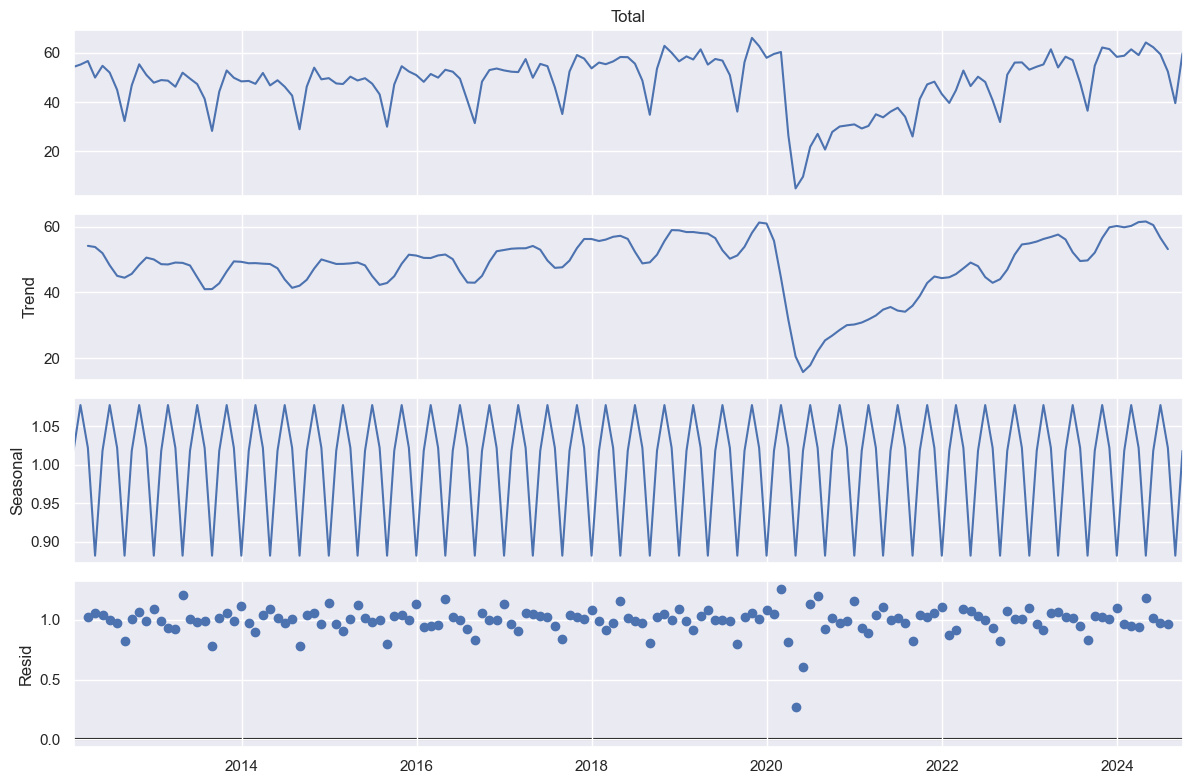

In [74]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(metro_M['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();